In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset=pd.read_csv('/content/IMDb_All_Genres_etf_clean1.csv')

In [3]:
df=dataset.tail(10)
df = df.drop('Movie_Title', axis = 1)
df

,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
5552,2006,"Directors:Aaron Seltzer, Jason Friedberg","Alyson Hannigan, Adam Campbell, Fred Willard, ...",2.8,83,A,$48.55M,Comedy,Romance
5553,2020,"Directors:Lawrence Raghavendra, Balakrishnan T...","Akshay Kumar, Kiara Advani, Sharad Kelkar, Ash...",2.6,141,UA 16+,Gross Unkown,Action,"Comedy, Horror"
5554,2007,"Directors:Jason Friedberg, Aaron Seltzer","Kal Penn, Jennifer Coolidge, Fred Willard, Ada...",2.4,86,U,$39.74M,Adventure,"Comedy, Fantasy"
5555,2005,Lawrence Guterman,"Jamie Kennedy, Traylor Howard, Alan Cumming, L...",2.2,94,U,$17.02M,Comedy,"Family, Fantasy"
5556,2018,Kamil Cetin,"Enes Batur, Bilal Hanci, Atakan Özyurt, Fatih ...",2.0,110,Not Rated,Gross Unkown,Comedy,Comedy
5557,2008,"Directors:Jason Friedberg, Aaron Seltzer","Carmen Electra, Vanessa Lachey, Nicole Parker,...",1.9,87,PG-13,$14.19M,Comedy,Sci-Fi
5558,2008,Tom Putnam,"Paris Hilton, Joel David Moore, Christine Laki...",1.9,91,PG-13,$0.03M,Comedy,Romance
5559,2003,Robert Iscove,"Kelly Clarkson, Justin Guarini, Katherine Bail...",1.9,81,PG,$4.92M,Comedy,"Musical, Romance"
5560,2004,Bob Clark,"Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",1.5,88,PG,$9.11M,Comedy,"Family, Sci-Fi"
5561,2017,Gökhan Gök,"Halil Söyletmez, Doga Konakoglu, Emre Keskin, ...",1.0,100,Not Rated,Gross Unkown,Comedy,Comedy


In [4]:
df['Total_Gross']  = df['Total_Gross'].str.replace('\W','')

<ipython-input-4-a4b927e9b097>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Total_Gross']  = df['Total_Gross'].str.replace('\W','')


In [5]:
df['Total_Gross'] = df['Total_Gross'].str.replace('M', '').replace('GrossUnkown', '')
df['Total_Gross'] = pd.to_numeric(df['Total_Gross'], errors='coerce')
df.dropna(subset=['Total_Gross'], inplace=True)
print(df)

      Year                                  Director  \
5552  2006  Directors:Aaron Seltzer, Jason Friedberg   
5554  2007  Directors:Jason Friedberg, Aaron Seltzer   
5555  2005                         Lawrence Guterman   
5557  2008  Directors:Jason Friedberg, Aaron Seltzer   
5558  2008                                Tom Putnam   
5559  2003                             Robert Iscove   
5560  2004                                 Bob Clark   

                                                 Actors  Rating  \
5552  Alyson Hannigan, Adam Campbell, Fred Willard, ...     2.8   
5554  Kal Penn, Jennifer Coolidge, Fred Willard, Ada...     2.4   
5555  Jamie Kennedy, Traylor Howard, Alan Cumming, L...     2.2   
5557  Carmen Electra, Vanessa Lachey, Nicole Parker,...     1.9   
5558  Paris Hilton, Joel David Moore, Christine Laki...     1.9   
5559  Kelly Clarkson, Justin Guarini, Katherine Bail...     1.9   
5560  Jon Voight, Scott Baio, Vanessa Angel, Skyler ...     1.5   

      Runtime(

In [6]:
df=df.iloc[:,:].values
df

array([[2006, 'Directors:Aaron Seltzer, Jason Friedberg',
        'Alyson Hannigan, Adam Campbell, Fred Willard, Jennifer Coolidge',
        2.8, 83, 'A', 4855.0, 'Comedy', ' Romance'],
       [2007, 'Directors:Jason Friedberg, Aaron Seltzer',
        'Kal Penn, Jennifer Coolidge, Fred Willard, Adam Campbell', 2.4,
        86, 'U', 3974.0, 'Adventure', ' Comedy,  Fantasy'],
       [2005, 'Lawrence Guterman',
        'Jamie Kennedy, Traylor Howard, Alan Cumming, Liam Falconer',
        2.2, 94, 'U', 1702.0, 'Comedy', ' Family,  Fantasy'],
       [2008, 'Directors:Jason Friedberg, Aaron Seltzer',
        'Carmen Electra, Vanessa Lachey, Nicole Parker, Matt Lanter',
        1.9, 87, 'PG-13', 1419.0, 'Comedy', ' Sci-Fi'],
       [2008, 'Tom Putnam',
        'Paris Hilton, Joel David Moore, Christine Lakin, Johann Urb',
        1.9, 91, 'PG-13', 3.0, 'Comedy', ' Romance'],
       [2003, 'Robert Iscove',
        'Kelly Clarkson, Justin Guarini, Katherine Bailess, Anika Noni Rose',
        1.

In [7]:
encoder=LabelEncoder()

In [8]:
df[:,8]=encoder.fit_transform(df[:,8])
df[1]

array([2007, 'Directors:Jason Friedberg, Aaron Seltzer',
       'Kal Penn, Jennifer Coolidge, Fred Willard, Adam Campbell', 2.4,
       86, 'U', 3974.0, 'Adventure', 0], dtype=object)

In [9]:
label_encoder = LabelEncoder()
df=pd.read_csv('/content/IMDb_All_Genres_etf_clean1.csv')
df['Total_Gross']  = df['Total_Gross'].str.replace('\W','')
df['Total_Gross'] = df['Total_Gross'].str.replace('M', '').replace('GrossUnkown', '')
df['Total_Gross'] = pd.to_numeric(df['Total_Gross'], errors='coerce')
df.dropna(subset=['Total_Gross'], inplace=True)


df['encode_genre'] = label_encoder.fit_transform(df['main_genre'])
df['encode_director'] = label_encoder.fit_transform(df['Director'])
df['encode_actor'] = label_encoder.fit_transform(df['Actors'])

# Concatenate all features
X = pd.concat([df['encode_genre'], df['encode_director'], df['encode_actor']], axis=1)

<ipython-input-9-61ddd14c2e85>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Total_Gross']  = df['Total_Gross'].str.replace('\W','')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8833 (34.50 KB)
Trainable params: 8833 (34.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
94/94 [==============================] - 3s 10ms/step - loss: 83350768.0000 - mae: 5276.1006 - val_loss: 85593736.0000 - val_mae: 5414.4282
Ep

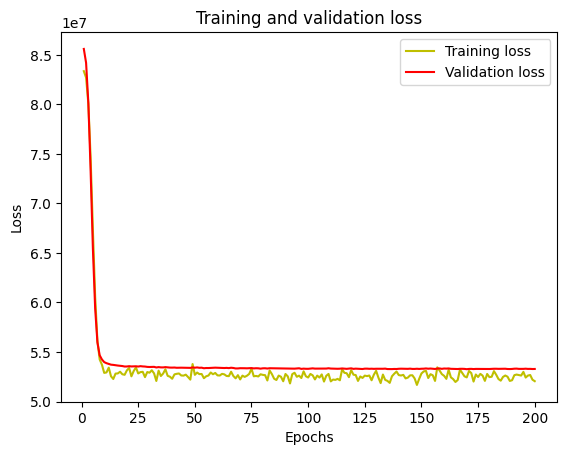

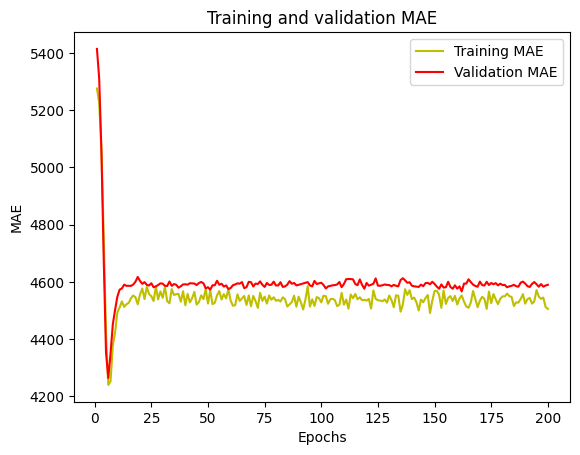

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt

y = df['Total_Gross']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()


history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=200)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [11]:
model.save('model200.h5')
from keras.models import load_model
loaded_model = load_model('/content/model200.h5')
X_test_scaled = scaler.transform(X_test)
predictions = loaded_model.predict(X_test_scaled)
predictions

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


30/30 [==============================] - 0s 2ms/step


array([[2696.169 ],
       [2708.3882],
       [8643.277 ],
       [7525.958 ],
       [3506.0024],
       [6115.5967],
       [3927.925 ],
       [6152.9404],
       [6411.02  ],
       [9252.079 ],
       [8734.424 ],
       [3639.5186],
       [5433.206 ],
       [3630.3145],
       [8910.742 ],
       [4388.4824],
       [3124.5498],
       [4135.9424],
       [7270.951 ],
       [3593.7625],
       [5998.825 ],
       [4682.516 ],
       [6049.9385],
       [3598.942 ],
       [4099.001 ],
       [2778.6328],
       [9219.114 ],
       [7858.1494],
       [3569.8687],
       [7952.5317],
       [2728.5198],
       [7147.198 ],
       [4414.1733],
       [8427.15  ],
       [2595.3413],
       [7227.104 ],
       [8100.45  ],
       [3694.393 ],
       [7602.492 ],
       [3122.1396],
       [7772.7935],
       [2906.2134],
       [8131.0083],
       [3424.2385],
       [2955.0269],
       [4634.6475],
       [7001.308 ],
       [3761.836 ],
       [6703.7637],
       [7813.6143],


In [12]:
from sklearn.metrics import mean_squared_error              #https://www.askpython.com/python/examples/rmse-root-mean-square-error
import math
MSE = mean_squared_error(y_test, predictions)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:",RMSE)

Root Mean Square Error: 7295.604634721722


In [13]:
slope,intercept = np.polyfit(y_test,predictions,1)          #https://stackoverflow.com/questions/9538525/calculating-slopes-in-numpy-or-scipy
print(slope)
print(intercept)

[0.06873363]
[4803.57160538]


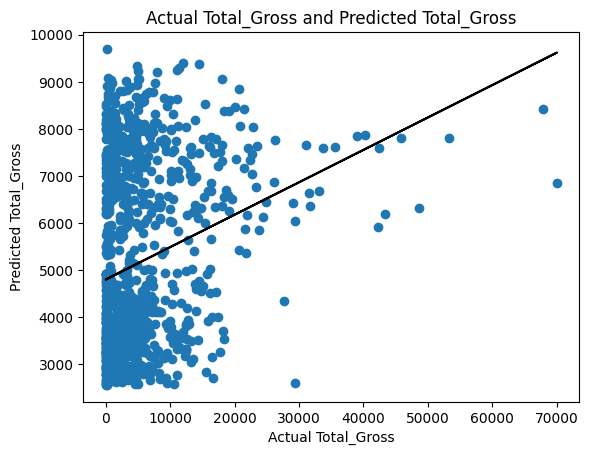

In [14]:
import matplotlib.pyplot as plt                             #https://www.geeksforgeeks.org/solving-linear-regression-in-python/
reg_line = slope * y_test + intercept
plt.scatter(y_test, predictions)
plt.plot(y_test,reg_line , color='black')
plt.xlabel('Actual Total_Gross')
plt.ylabel('Predicted Total_Gross')
plt.title('Actual Total_Gross and Predicted Total_Gross')
plt.show()